In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn import tree

In [297]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [298]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [299]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [300]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [301]:
data.shape

(400, 11)

In [302]:
data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [303]:
data['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [304]:
data['US'].unique()

array(['Yes', 'No'], dtype=object)

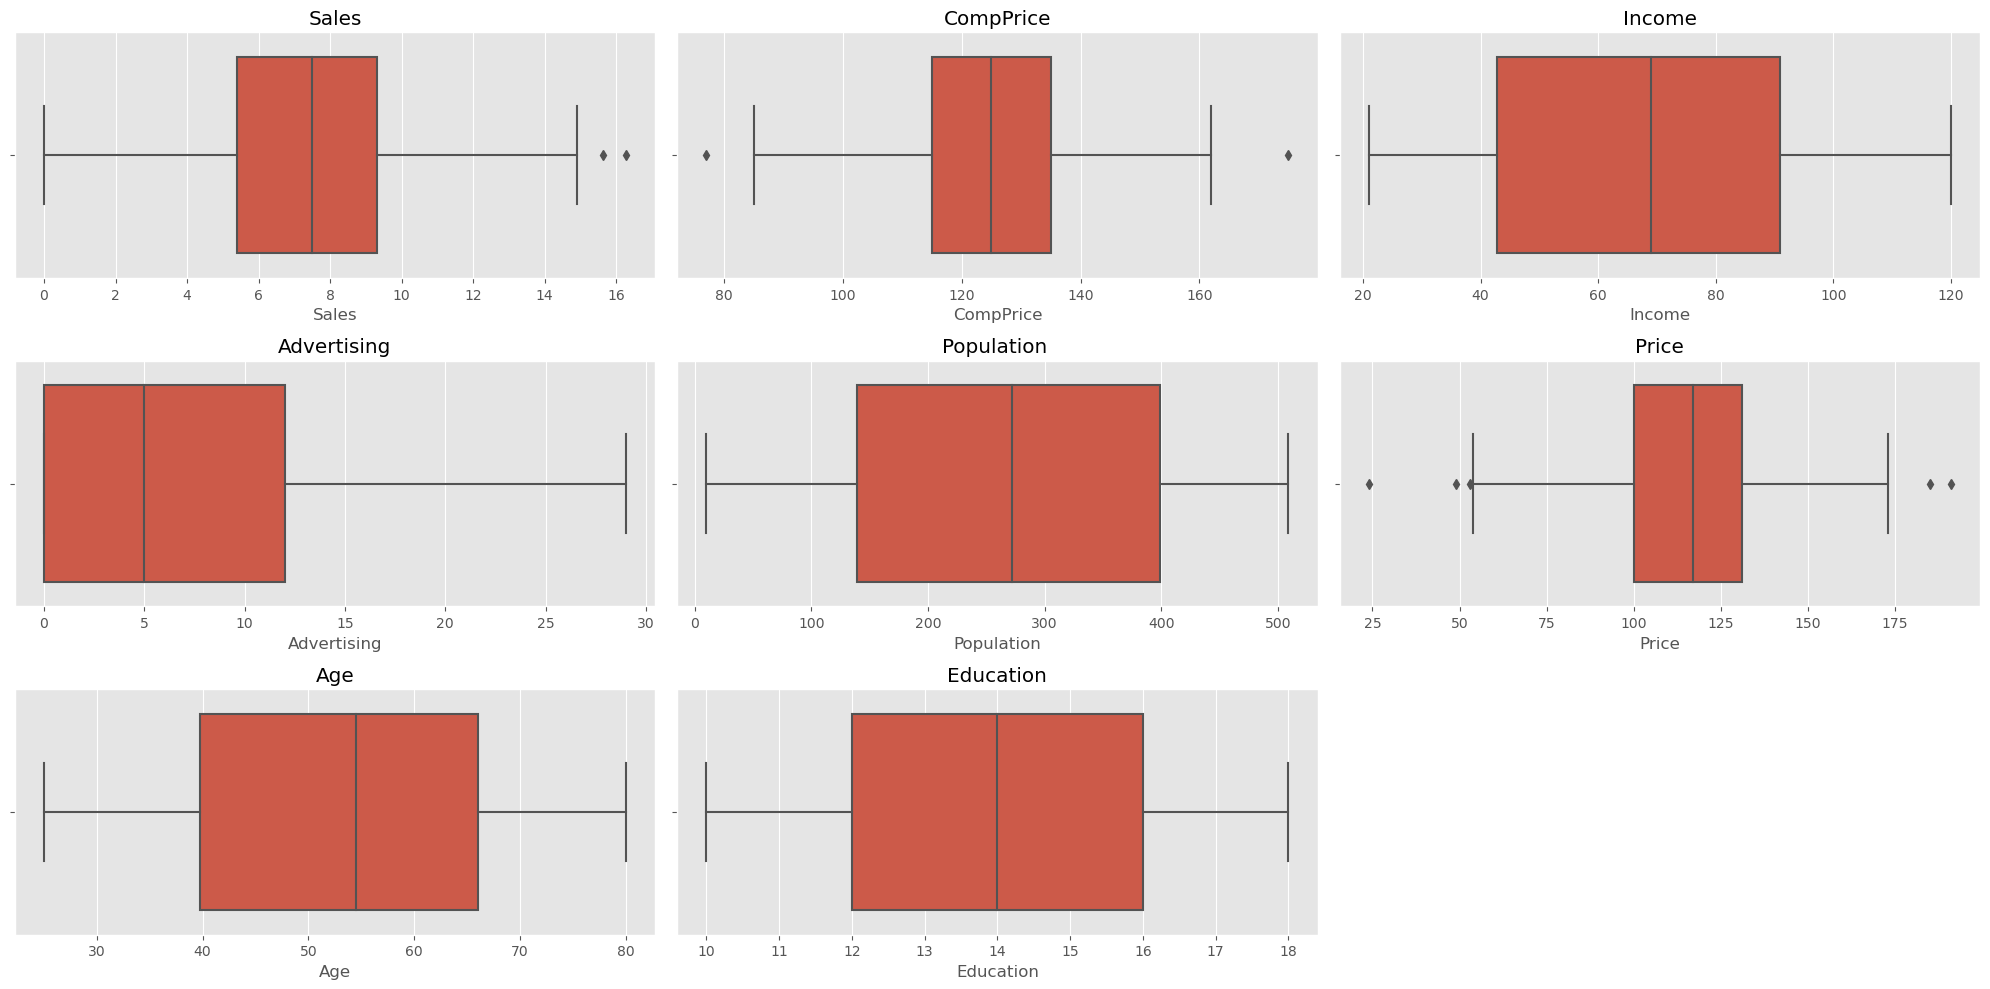

In [305]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
sns.boxplot(x='Sales', data = data)
plt.title('Sales')

plt.subplot(3,3,2)
sns.boxplot(x='CompPrice', data = data)
plt.title('CompPrice')

plt.subplot(3,3,3)
sns.boxplot(x='Income', data = data)
plt.title('Income')

plt.subplot(3,3,4)
sns.boxplot(x='Advertising', data = data)
plt.title('Advertising')

plt.subplot(3,3,5)
sns.boxplot(x='Population', data = data)
plt.title('Population ')

plt.subplot(3,3,6)
sns.boxplot(x='Price', data = data)
plt.title('Price')

plt.subplot(3,3,7)
sns.boxplot(x='Age', data = data)
plt.title('Age')

plt.subplot(3,3,8)
sns.boxplot(x='Education', data = data)
plt.title('Education')
plt.tight_layout()


In [306]:
 #There are some outliers, hence we will remove them

In [307]:
data.drop(data.index[data['Sales']>14] , inplace= True)
data.drop(data.index[data['CompPrice']>165] , inplace= True)
data.drop(data.index[data['CompPrice']<80] , inplace= True)
data.drop(data.index[data['Price']>175] , inplace= True)
data.drop(data.index[data['Price']<60] , inplace= True)

In [308]:
data.shape

(389, 11)

In [309]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [310]:
data['Sales'].nunique()

326

In [311]:
data['Sales'].mean()

7.418688946015424

In [312]:
 #Adding new column 'sales_status' as per problem statement

In [313]:
data['sales_status'] = '<7.5'

In [314]:
data.loc[data['Sales'] >= 7.5 ,'sales_status'] = 'High'
data.loc[data['Sales'] < 7.5 , 'sales_status'] = 'low'
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [315]:
data.drop('Sales' , axis = 1 , inplace= True)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [316]:
data['sales_status'].value_counts()

low     199
High    190
Name: sales_status, dtype: int64

In [317]:
label_en = LabelEncoder()
for i in range (0, data.shape[1]):
    if data.dtypes[i] == 'object':
        data[data.columns[i]] = label_en.fit_transform(data[data.columns[i]])        

In [318]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


## Splitting data and building the model

In [319]:
x = data.drop('sales_status' , axis = 1)
y =data[['sales_status']]

In [320]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2,random_state= 1)

In [321]:
model = DecisionTreeClassifier()
criterion = ['gini' , 'entropy']
max_depth = range(1,20)
splitter = ['best' , 'random']
param_grid = [{'criterion':criterion, 'max_depth':max_depth, 'splitter':splitter}]
grid = GridSearchCV(estimator = model ,param_grid = param_grid )
grid.fit(x_train , y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 20),
                          'splitter': ['best', 'random']}])

In [322]:
print('best_params:' , grid.best_params_)
print('best_score:' , grid.best_score_)

best_params: {'criterion': 'entropy', 'max_depth': 13, 'splitter': 'best'}
best_score: 0.7429083461341526


In [323]:
 #After fine tuning, we have found that model is giving best score by using 'gini' criterion with max_depth of tree as '7'.


In [324]:
# Building the final decision tree model with the above parameters.


In [325]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=7,splitter='best')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

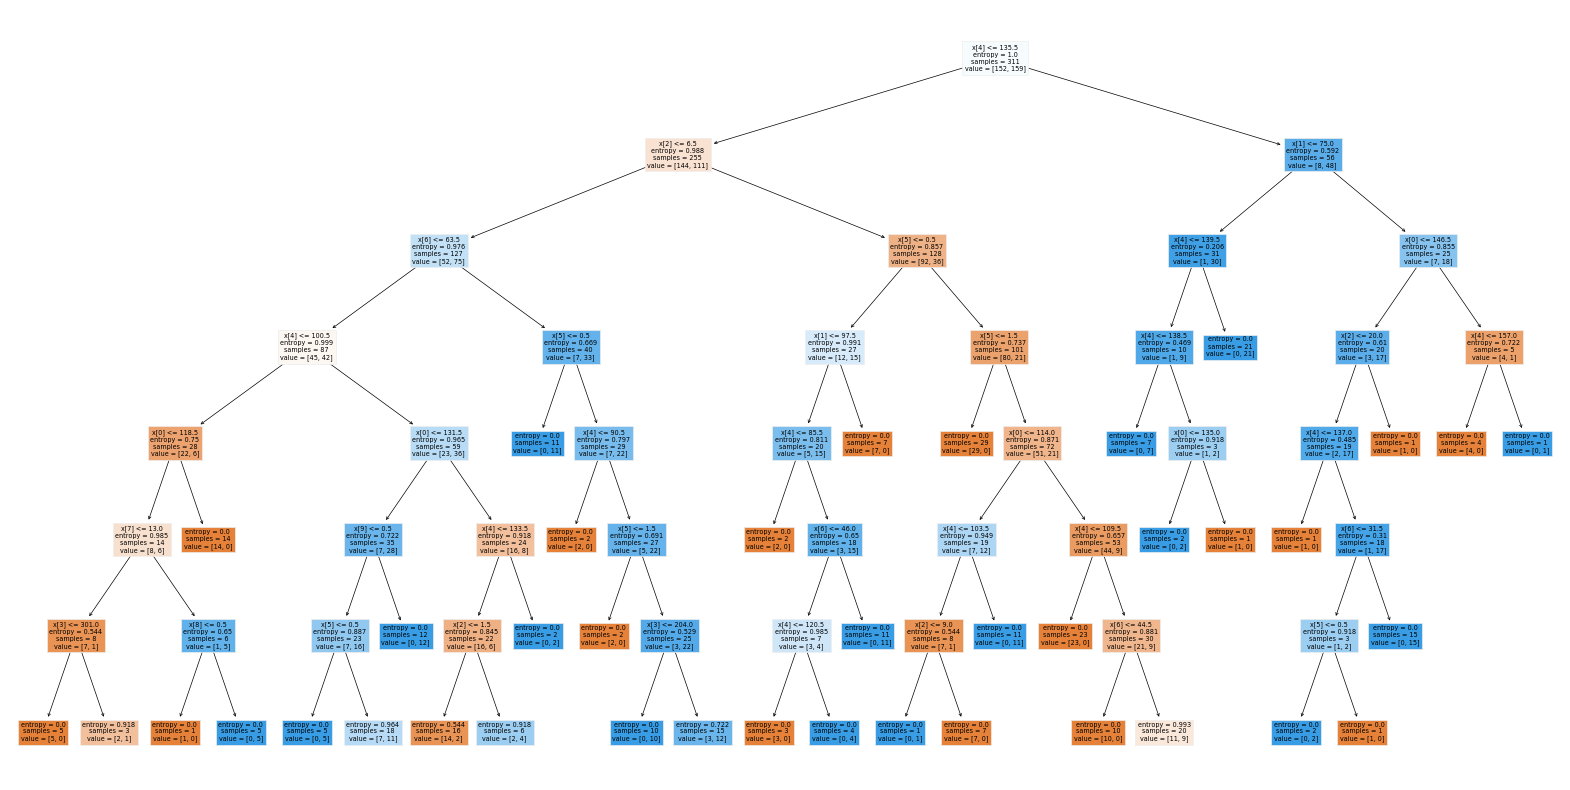

In [326]:
plt.figure(figsize=(20,10))
tree.plot_tree(dtc,filled=True)
plt.show()

## Model Evaluation

In [327]:
y_pred = dtc.predict(x_test)
accuracy_score(y_test , y_pred)

0.7435897435897436

In [328]:
confusion_matrix(y_test , y_pred)

array([[28, 10],
       [10, 30]], dtype=int64)

In [329]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.75      0.75      0.75        40

    accuracy                           0.74        78
   macro avg       0.74      0.74      0.74        78
weighted avg       0.74      0.74      0.74        78



In [330]:
print('Training accuracy: ', dtc.score(x_train,y_train))
print('Testing Accuracy: ', dtc.score(x_test,y_test))

Training accuracy:  0.9228295819935691
Testing Accuracy:  0.7435897435897436
